In [17]:
# Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)


In [18]:
raw_adult_data <- read_csv("adult.data")

colnames(raw_adult_data) <- c("age", "work_class", "fnlwgt", "education", "education_num", "marital_stat", "occupation",
                             "relationship", "race", "sex", "capital_gain", "capital_loss", "hrs_per_week", "country")

head(raw_adult_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  `39` = col_double(),
  `State-gov` = col_character(),
  `77516` = col_double(),
  Bachelors = col_character(),
  `13` = col_double(),
  `Never-married` = col_character(),
  `Adm-clerical` = col_character(),
  `Not-in-family` = col_character(),
  White = col_character(),
  Male = col_character(),
  `2174` = col_double(),
  `0` = col_double(),
  `40` = col_double(),
  `United-States` = col_character(),
  `<=50K` = col_character()
)




age work_class       fnlwgt education education_num marital_stat         
1 50  Self-emp-not-inc  83311 Bachelors 13            Married-civ-spouse   
2 38  Private          215646 HS-grad    9            Divorced             
3 53  Private          234721 11th       7            Married-civ-spouse   
4 28  Private          338409 Bachelors 13            Married-civ-spouse   
5 37  Private          284582 Masters   14            Married-civ-spouse   
6 49  Private          160187 9th        5            Married-spouse-absent
  occupation        relationship  race  sex    capital_gain capital_loss
1 Exec-managerial   Husband       White Male   0            0           
2 Handlers-cleaners Not-in-family White Male   0            0           
3 Handlers-cleaners Husband       Black Male   0            0           
4 Prof-specialty    Wife          Black Female 0            0           
5 Exec-managerial   Wife          White Female 0            0           
6 Other-service     Not-in-family Black Female 0            0           
  hrs_per_week country       <NA> 
1 13           United-States <=50K
2 40           United-States <=50K
3 40           United-States <=50K
4 40           Cuba          <=50K
5 40           United-States <=50K
6 16           Jamaica       <=50K

In [19]:
adult_data <- raw_adult_data %>%
            select(sex, hrs_per_week)

male_data <- adult_data %>%
                filter(sex == "Male") %>%
                rep_sample_n(size = 100, reps = 1) %>%
                ungroup() %>%
                select(sex, hrs_per_week)

female_data <- adult_data %>%
                filter(sex == "Female")%>%
                rep_sample_n(size = 100, reps = 1) %>%
                ungroup() %>%
                select(sex, hrs_per_week)

head(male_data)
head(female_data)

sex  hrs_per_week
1 Male 40          
2 Male 40          
3 Male 50          
4 Male 16          
5 Male 40          
6 Male 40

sex    hrs_per_week
1 Female 40          
2 Female 40          
3 Female 38          
4 Female 40          
5 Female 15          
6 Female 32

In [20]:
set.seed(2078)

bootstrapped_male <- male_data %>%
                    rep_sample_n(size = 100, reps = 1500, replace = TRUE) %>%
                    group_by(replicate) %>%
                    summarize(bootstrap_mean = mean(hrs_per_week))

bootstrapped_female <- female_data %>%
                    rep_sample_n(size = 100, reps = 1500, replace = TRUE) %>%
                    group_by(replicate) %>%
                    summarize(bootstrap_mean = mean(hrs_per_week))

head(bootstrapped_male)
head(bootstrapped_female)

replicate bootstrap_mean
1 1         41.55         
2 2         40.40         
3 3         40.34         
4 4         41.70         
5 5         39.51         
6 6         39.74

replicate bootstrap_mean
1 1         35.98         
2 2         36.29         
3 3         37.57         
4 4         36.54         
5 5         37.40         
6 6         34.79

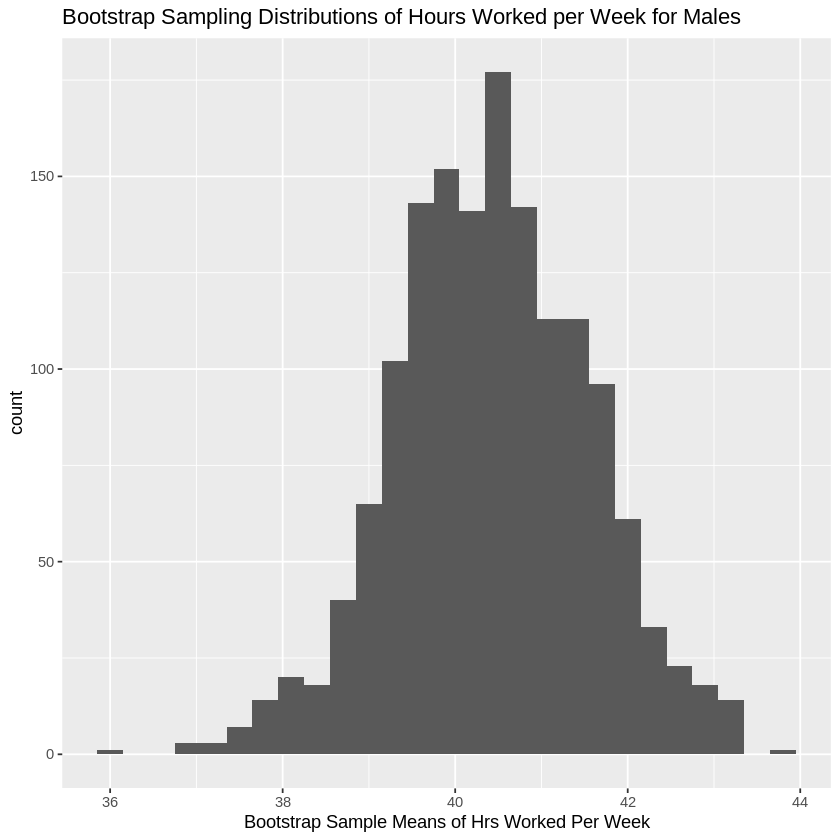

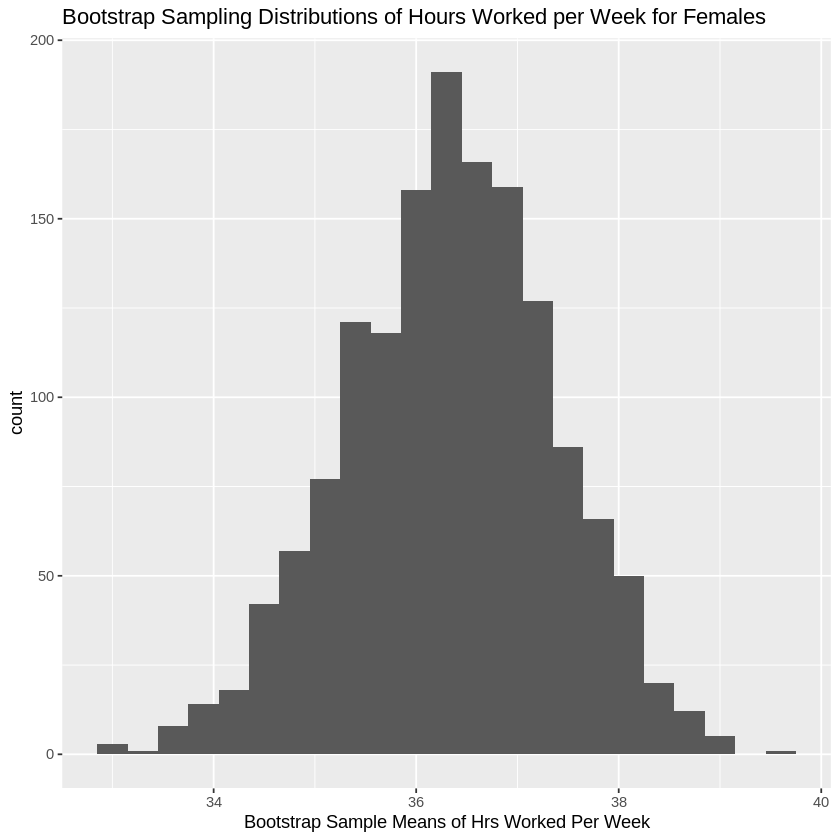

In [23]:
bootstrapped_male_distribution <- bootstrapped_male %>%
                                    ggplot(aes(x = bootstrap_mean)) +
                                    geom_histogram(binwidth = 0.3) +
                                    xlab("Bootstrap Sample Means of Hrs Worked Per Week") +
                                    ggtitle("Bootstrap Sampling Distributions of Hours Worked per Week for Males")

bootstrapped_female_distribution <- bootstrapped_female %>%
                                    ggplot(aes(x = bootstrap_mean)) +
                                    geom_histogram(binwidth = 0.3) +
                                    xlab("Bootstrap Sample Means of Hrs Worked Per Week") +
                                    ggtitle("Bootstrap Sampling Distributions of Hours Worked per Week for Females")

bootstrapped_male_distribution
bootstrapped_female_distribution